In [117]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline0
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

## Defining the working directory

In [118]:
input_path = '/content/drive/MyDrive/Assignment/data.csv'

## Importing Data

In [119]:
bank_data = pd.read_csv(input_path)
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [120]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Computing the descriptive statistics of our numrerical features

In [121]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


## Checking Nan presence

In [122]:
bank_data.isna().sum().max()

0

## Checking for duplicates

In [123]:
bank_data.duplicated().sum()

0

## Check for skewness

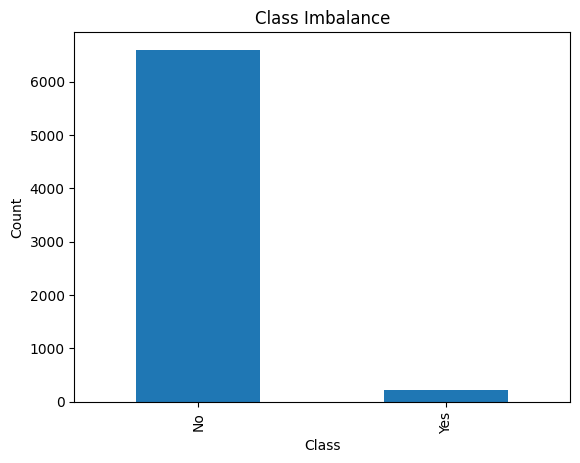

In [124]:
bank_data["Bankrupt?"].value_counts().plot(kind="bar")
plt.xticks(np.arange(2), ["No", "Yes"])
plt.title("Class Imbalance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Looking at histograms

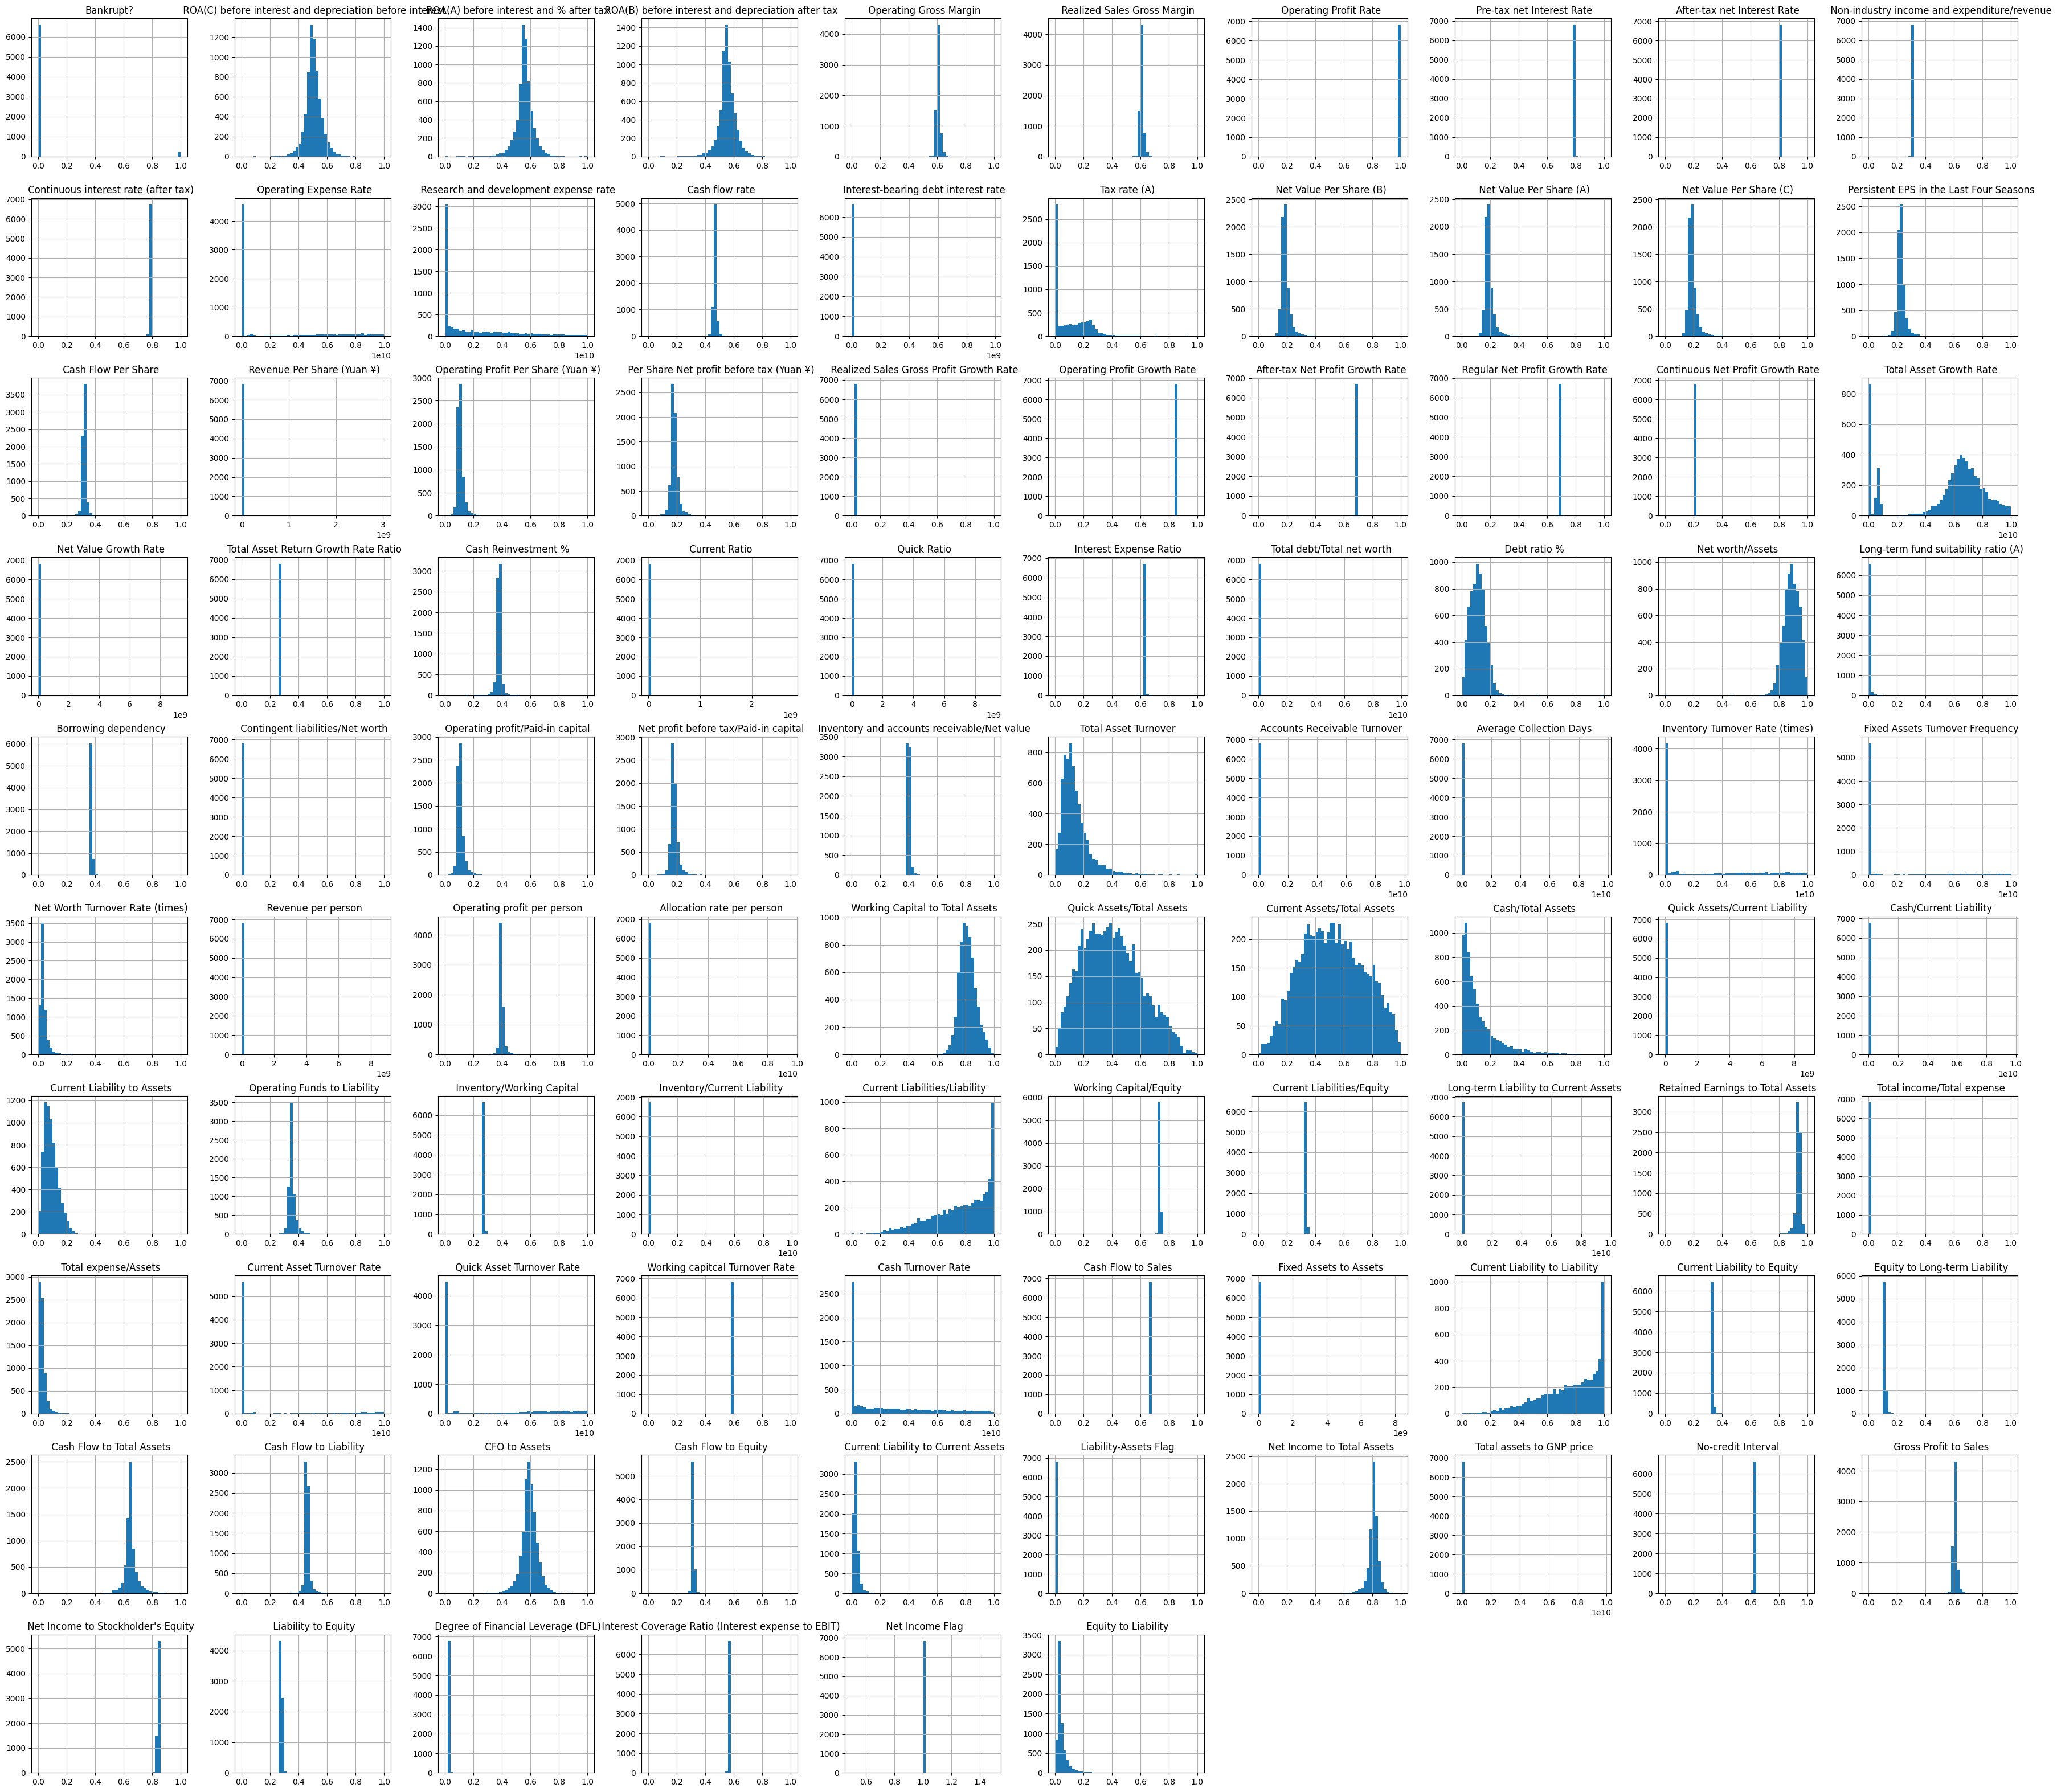

In [125]:
bank_data.hist(figsize = (45,40), bins = 50)
plt.show()

## Correlation Heatmap (Spearman)

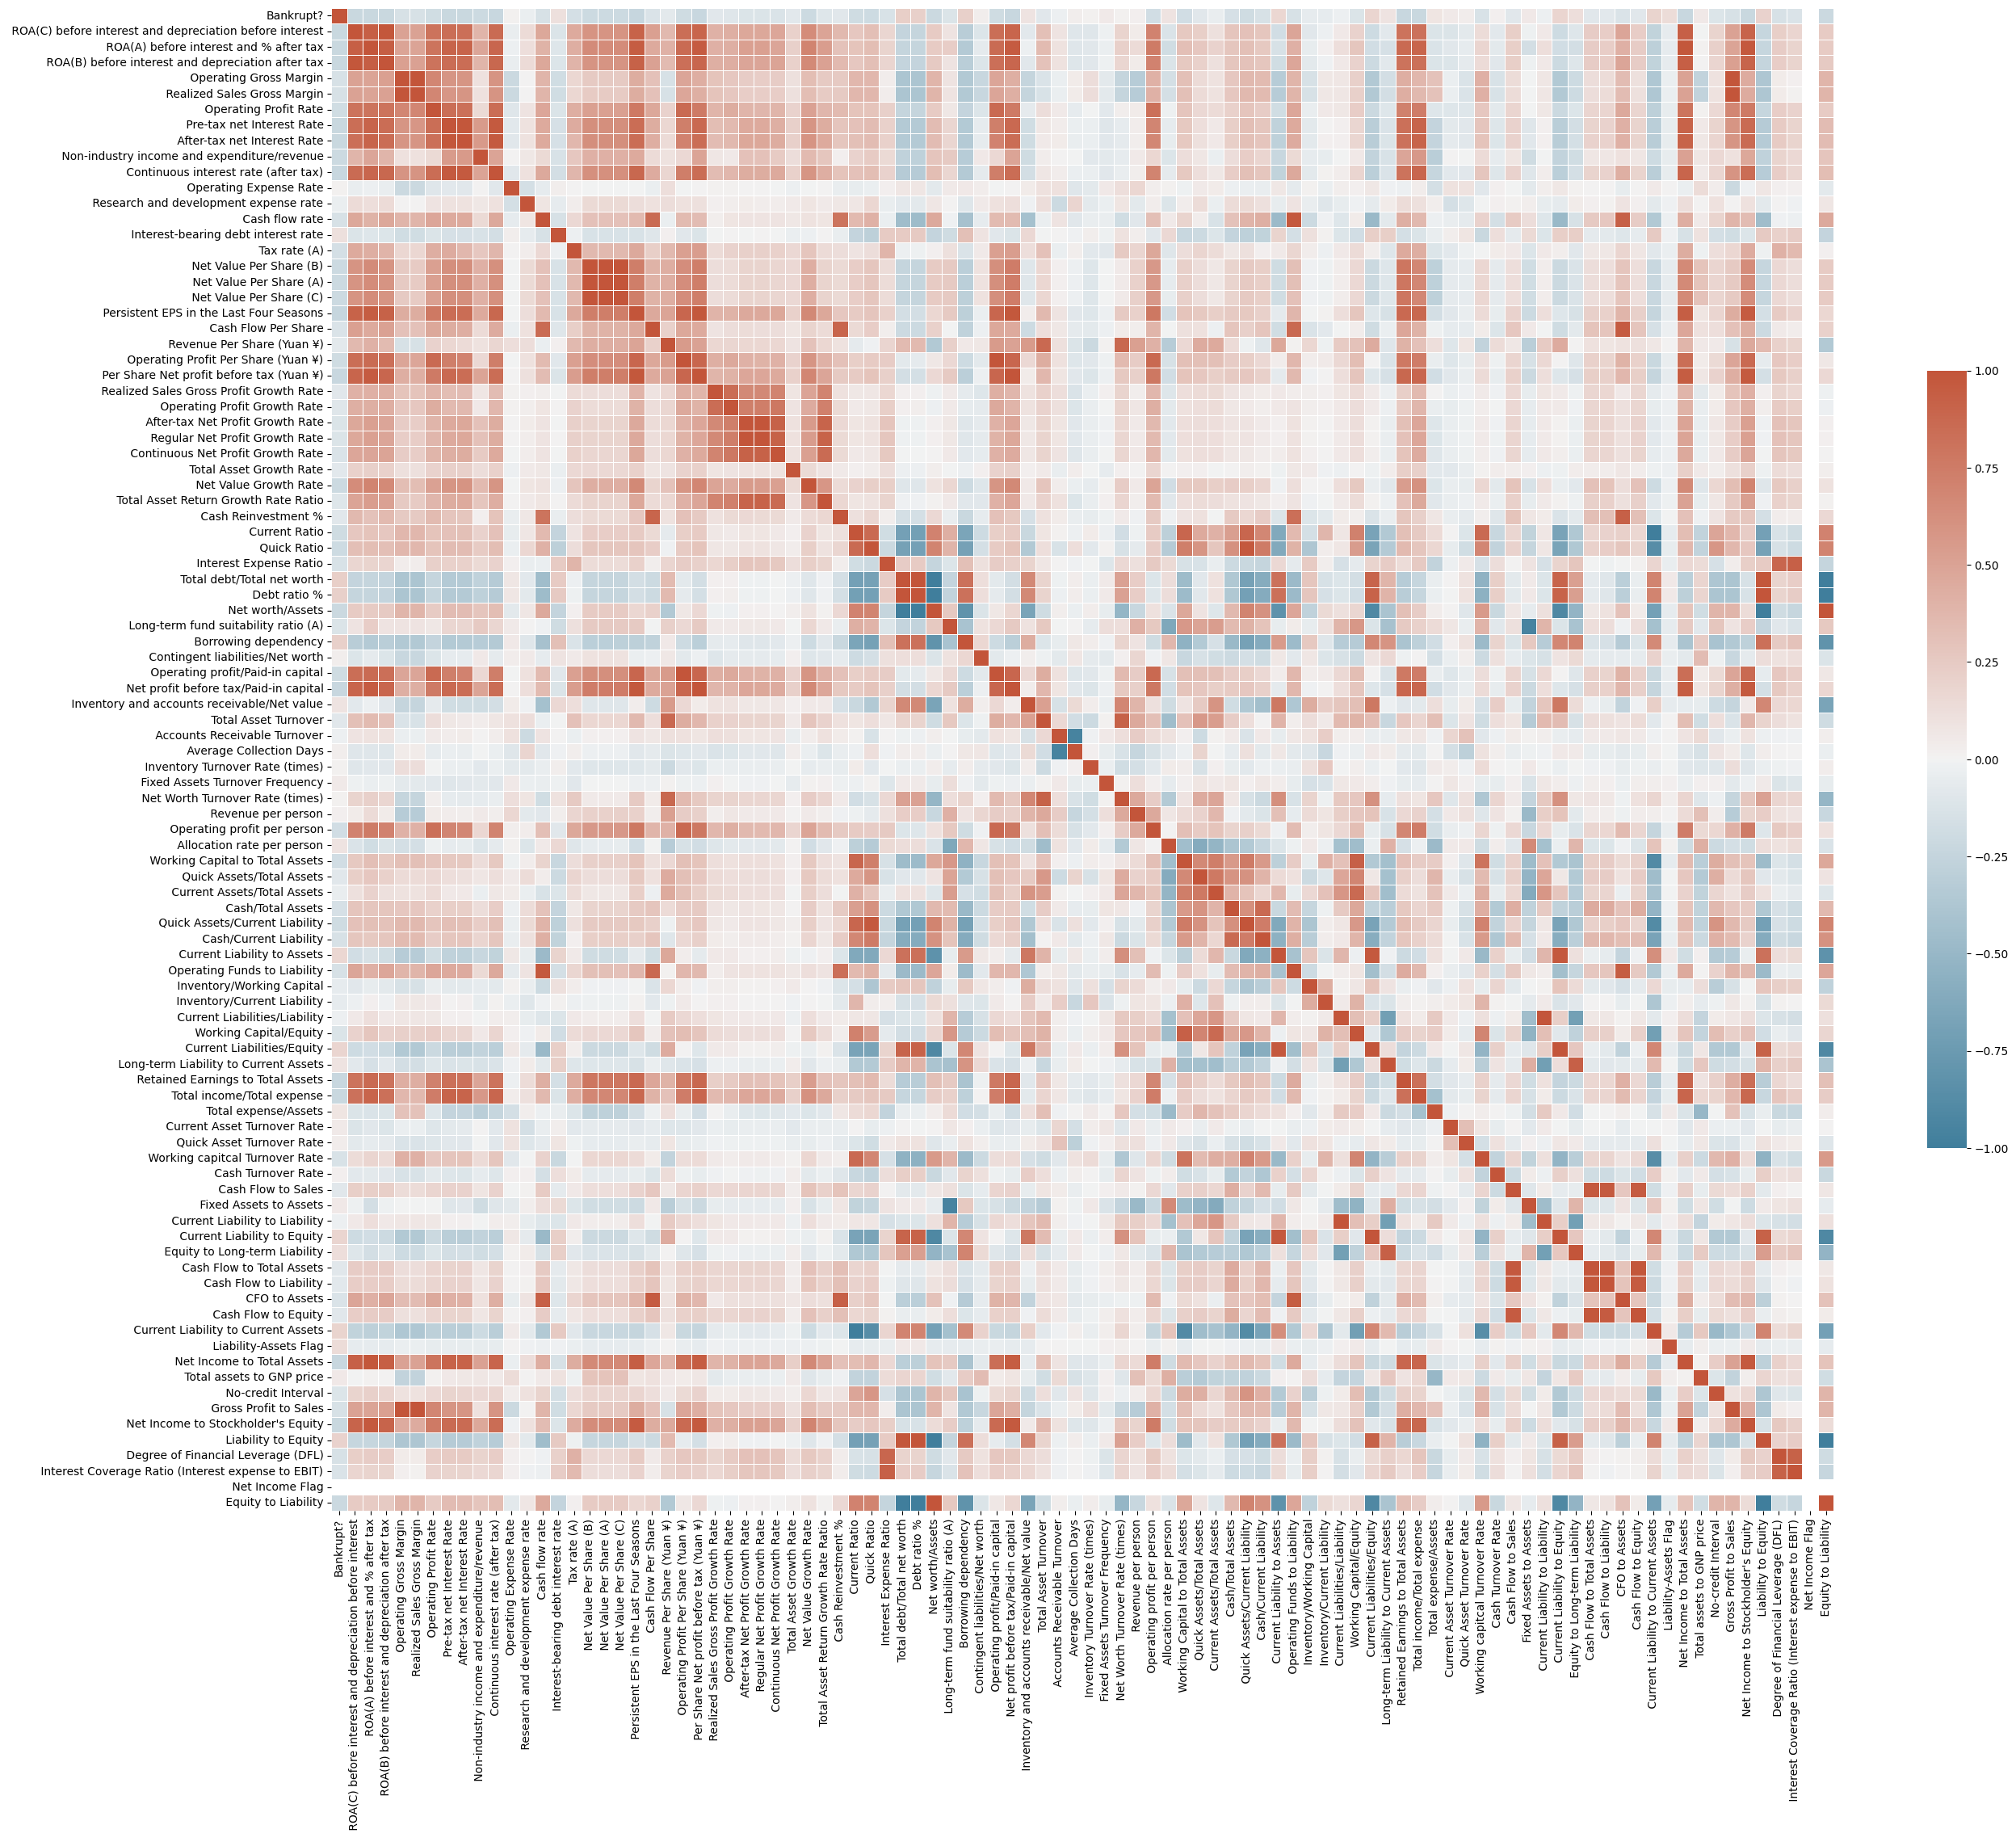

In [126]:
f, ax = plt.subplots(figsize=(30, 25))
mat = bank_data.corr('spearman')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Plotting Boxplots of the numerical features

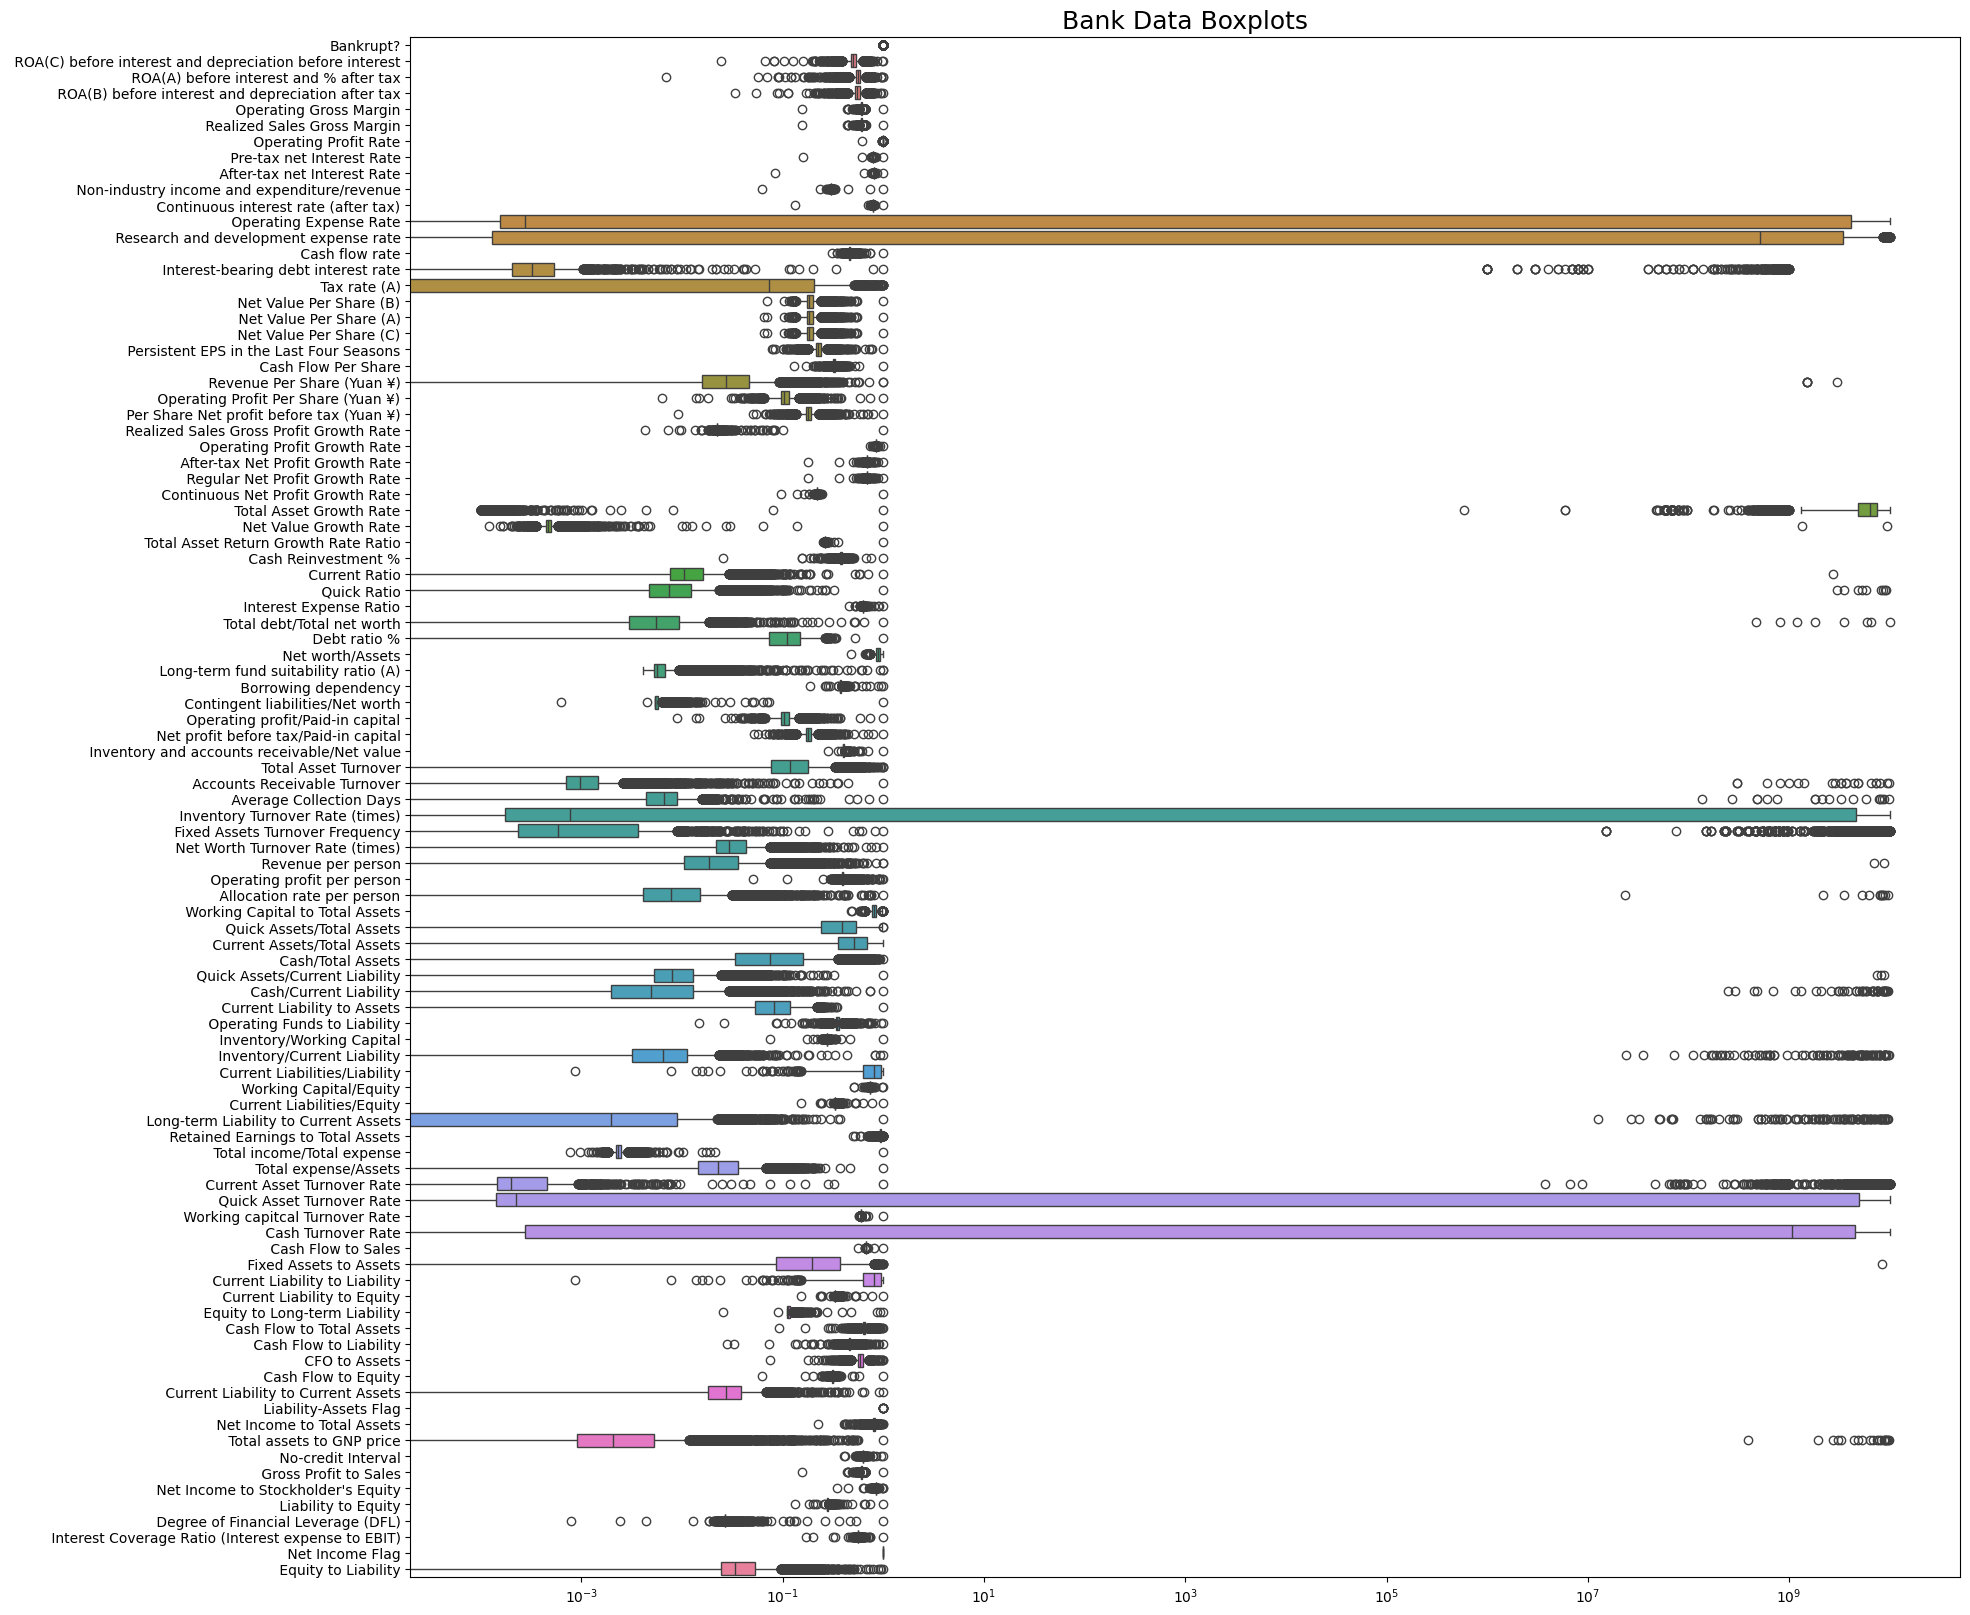

In [127]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [128]:
# def outliers_removal(feature, feature_name, dataset):
#     # Identify 25th & 75th quartiles
#     q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)

#     feat_iqr = q75 - q25
#     feat_cut_off = feat_iqr * 1.5
#     feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off

#     # Identify and remove outliers
#     outliers = dataset[(dataset[feature_name] < feat_lower) | (dataset[feature_name] > feat_upper)]
#     print(f'{feature_name} outliers removed: {len(outliers)}')

#     # Drop outliers
#     dataset = dataset.drop(outliers.index)

#     return dataset

# # Make a copy of the dataset before removing outliers
# new_df = bank_data.copy()

# # Iterate over each column in the dataset
# for col in bank_data.columns:
#   new_df = outliers_removal(bank_data[col], col, new_df)

# # Check the shape of the cleaned dataset
# print(f'Original dataset shape: {bank_data.shape}')
# print(f'New dataset shape after outlier removal: {new_df.shape}')


In [129]:
def log_trans(data):
    data_copy = data.copy()

    for col in data_copy:
      skew = data[col].skew()
      if skew > 0.5 or skew < -0.5:
        data_copy[col] = np.log1p(data[col])
      else:
        print(f"Col {col} is not skewed")
        continue
    return data_copy

# Apply the log transformation to your dataframe
new_df = bank_data.copy()
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)
data_norm = log_trans(new_df)

Col  ROA(C) before interest and depreciation before interest is not skewed
Col  Working Capital to Total Assets is not skewed
Col  Quick Assets/Total Assets is not skewed
Col  Current Assets/Total Assets is not skewed
Col  Cash Flow to Total Assets is not skewed
Col  CFO to Assets is not skewed
Col  Net Income Flag is not skewed


## Splitting Train and Test Data

In [130]:
X_raw,X_test,Y_raw,Y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.2,
                                              stratify = labels,
                                              random_state = 42)

## Creating the Autoencoder

In [131]:
class AutoencoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_dim=32, hidden_dims=[], epochs=50, batch_size=256, dropout_rate=0.2):
        self.encoding_dim = encoding_dim
        self.hidden_dims = hidden_dims
        self.epochs = epochs
        self.batch_size = batch_size
        self.dropout_rate = dropout_rate
        self.autoencoder = None
        self.encoder = None

    def create_autoencoder(self, input_dim):
        input_layer = tf.keras.layers.Input(shape=(input_dim,))
        x = input_layer

        # Encoder
        for dim in self.hidden_dims + [self.encoding_dim]:
            x = tf.keras.layers.Dense(dim, activation='relu')(x)
            x = tf.keras.layers.Dropout(self.dropout_rate)(x)

        encoded = x

        # Decoder
        for dim in reversed(self.hidden_dims):
            x = tf.keras.layers.Dense(dim, activation='relu')(x)
            x = tf.keras.layers.Dropout(self.dropout_rate)(x)

        decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(x)

        self.autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded)
        self.encoder = tf.keras.models.Model(inputs=input_layer, outputs=encoded)

        self.autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    def fit(self, X, y=None):
        self.create_autoencoder(X.shape[1])
        self.autoencoder.fit(X, X, epochs=self.epochs, batch_size=self.batch_size, shuffle=True, validation_split=0.2, verbose=0)
        return self

    def transform(self, X):
        return self.encoder.predict(X)

In [132]:
def create_pipeline(use_autoencoder=True, use_feature_selection=False, use_smote=True, n_features_to_select=10):
    steps = [('scaler', StandardScaler())]

    if use_feature_selection:
        steps.append(('feature_selection', SelectKBest(f_classif, k=n_features_to_select)))

    if use_smote:
        steps.append(('smote', SMOTE(sampling_strategy='minority')))

    if use_autoencoder:
        steps.append(('autoencoder', AutoencoderTransformer()))


    steps.append(('classifier', LogisticRegression()))

    return ImbPipeline(steps)

In [133]:
def flexible_logistic_regression(X, y, use_autoencoder=True, use_feature_selection=False, use_smote=True, n_splits=5, n_iter=10, random_state=42):
    # Define the parameter grid
    param_grid = {
        "classifier__penalty": ['l2'],
        "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "classifier__class_weight": ['balanced', None],
        "classifier__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

    if use_autoencoder:
        param_grid.update({
            "autoencoder__encoding_dim": [16, 32, 64],
            "autoencoder__hidden_dims": [[], [64], [128, 64]],
            "autoencoder__epochs": [30, 50, 100],
            "autoencoder__batch_size": [128, 256, 512],
            "autoencoder__dropout_rate": [0.1, 0.2, 0.3]
        })

    if use_feature_selection:
        param_grid["feature_selection__k"] = [5, 10, 20, 30]

    # Initialize cross-validation
    sss = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Initialize lists to store performance metrics
    metrics = {
        'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []
    }

    # Create the pipeline with SMOTE and Logistic Regression
    pipeline = create_pipeline(use_autoencoder, use_feature_selection, use_smote)

    # Initialize RandomizedSearchCV
    rand_search = RandomizedSearchCV(pipeline, param_grid, n_iter=n_iter, cv=sss, random_state=random_state, n_jobs=-1, scoring='f1')

    # Fit the model and perform cross-validation
    rand_search.fit(X, y)

    # Get the best estimator
    best_model = rand_search.best_estimator_

    # Perform cross-validation with the best model
    for train, val in sss.split(X, y):
        X_train, X_val = X.iloc[train], X.iloc[val]
        y_train, y_val = y.iloc[train], y.iloc[val]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_val)

        metrics['accuracy'].append(accuracy_score(y_val, y_pred))
        metrics['precision'].append(precision_score(y_val, y_pred))
        metrics['recall'].append(recall_score(y_val, y_pred))
        metrics['f1'].append(f1_score(y_val, y_pred))
        metrics['auc'].append(roc_auc_score(y_val, y_pred))

    # Print results
    print('Logistic Regression (SMOTE) results:')
    print('')
    for metric, scores in metrics.items():
        print(f"{metric}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    print('')
    print(f"Best parameters: {rand_search.best_params_}")

    return best_model, metrics

# Usage
best_model, metrics = flexible_logistic_regression(X_raw, Y_raw, use_autoencoder=True, use_feature_selection=False)

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Logistic Regression (SMOTE) results:

accuracy: 0.8759 (+/- 0.0112)
precision: 0.1675 (+/- 0.0061)
recall: 0.7165 (+/- 0.0876)
f1: 0.2709 (+/- 0.0105)
auc: 0.7989 (+/- 0.0372)

Best parameters: {'classifier__solver': 'newton-cg', 'classifier__penalty': 'l2', 'classifier__class_weight': 'balanced', 'classifier__C': 100, 'autoencoder__hidden_dims': [], 'autoencoder__epochs': 100, 'autoencoder__encoding_dim': 64, 'autoencoder__dropout_rate': 0.3, 'autoencoder__batch_size': 512}


In [134]:
label = ['Not Bankrupt', 'Bankrupt']
pred_reg_sm = best_model.predict(X_test)
print(classification_report(Y_test, pred_reg_sm, target_names=label))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

Not Bankrupt       0.99      0.89      0.93      1320
    Bankrupt       0.16      0.66      0.26        44

    accuracy                           0.88      1364
   macro avg       0.57      0.77      0.60      1364
weighted avg       0.96      0.88      0.91      1364



## Plotting confusion matrix

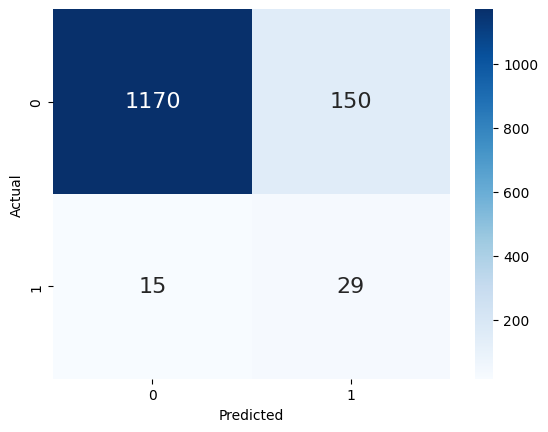

In [135]:
conf_mx = confusion_matrix(Y_test,pred_reg_sm)

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(Y_test), index = np.unique(Y_test))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'

sns.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')
plt.show()